# 6.1 정렬 알고리즘

* 정렬이란?
<br> : 키(key)를 항목값의 대소 관계에 따라 데이터 집합을 일정한 순서로 바꾸어 늘어놓는 작업
<br> : 데이터를 정렬하면 더 쉽게 검색할 수 있다는 장점이 있다.
<br> : 작은 데이터를 앞쪽으로 늘어놓는 것 => 오름차순(ascending) 정렬
<br> : 큰 데이터를 뒷쪽에 늘어놓는 것 => 내림차순(descending) 정렬

정렬 알고리즘은 
1. 안정적인 알고리즘
2. 불안정적인 알고리즘

으로 나눌 수 있다.

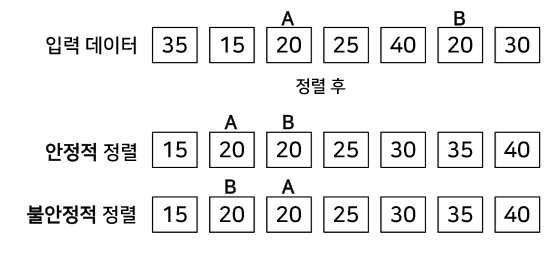

위의 그림에서 처럼 안정적인 정렬은 값이 같은 원소의 순서가 정렬한 후에도 유지된다. <br> 반면 불안정적인 정렬은 정렬된 후에도 원소의 순서가 같게 유지된다고 보장할 수 없다. 

>내부 정렬(internal sorting) : 정렬할 모든 데이터를 하나의 배열에 저장할 수 있는 경우에 사용
<br> 외부 정렬(external sorting) : 정렬할 데이터가 많아서 하나의 배열에 저장할 수 없는 경우에 사용

**"정렬 알고리즘의 핵심은 교환, 선택, 삽입이다."**

#6.2 버블 정렬

버블 정렬(bubble sort)이란?
<br> 이웃한 두 원소의 대소 관계를 비교하여 필요에 따라 교환을 반복하는 알고리즘 (단순 교환 정렬)


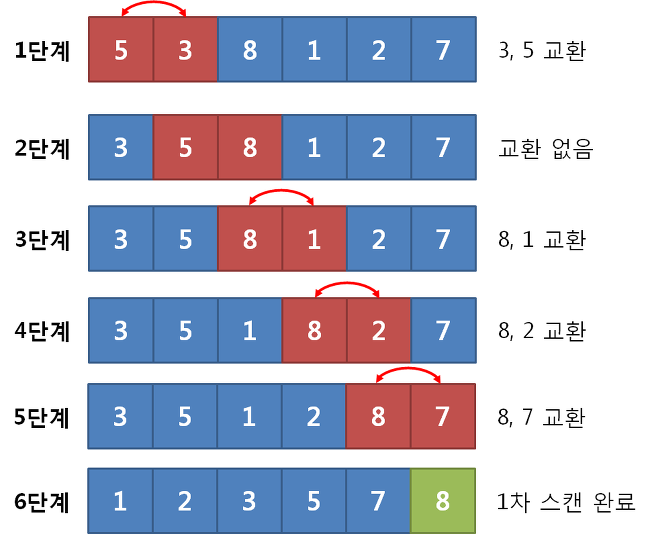

**'원소 수가 n개'**인 배열에서 이웃하는 원소를 **'비교'**하고, 필요하면 **'교환'**하는 과정을 <br>**'n-1번'** 거쳐 가장 작은 원소를 제일 앞(오름차순일 때)으로 보낸다.
> 이러한 일련의 비교,교환하는 과정을 **패스(pass)**라고 한다.
<br> 위의 과정은 버블 정렬의 첫번째 패스를 나타낸다.

* 버블 정렬의 패스횟수와 시간 복잡도
> 패스를 한 번 수행할 때마다 정렬할 대상은 1개씩 줄어든다.
<br> 그러므로 총 패스 횟수는 $(n-1)+(n-2)+\dots+2+1 = \frac{n(n-1)}{2}$이므로 ($←$ 등차수열의 합 공식 사용)
<br> 버블 정렬의 시간 복잡도는 $O(n^2)$ 이다. 

In [ ]:
# 실습 6-1
# 버블 정렬 알고리즘 구현하기

from typing import MutableSequence      # 가변 시퀀스형

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬"""
    n = len(a)
    for i in range(n - 1):
        for j in range(n - 1, i, -1):       # 뒤에서부터 비교 시작(인덱스가 0부터 시작한다는걸 잊지말자)
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]     # 변경 필요하면 인덱스 바꿔서 변경해주기

if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 입력한 수만큼 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    bubble_sort(x)  # 배열 x를 버블 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

In [ ]:
for i in range(7, 0, -1):
    print(i)

*NOTE*
<br> collections.MutableSequence 은 가변 시퀀스형을 뜻한다.
<br> 말 그대로 변경할 수 있는 시퀀스형(eg.리스트)을 말한다.

In [ ]:
# 실습 6-2
# 버블 정렬 알고리즘 구현(정렬 과정을 출력)

from typing import MutableSequence

def bubble_sort_verbose(a: MutableSequence) -> None:
    """버블 정렬(정렬 과정을 출력)"""
    ccnt = 0  # 비교 횟수
    scnt = 0  # 교환 횟수
    n = len(a)
    for i in range(n - 1):
        print(f'패스 {i + 1}')      # 몇번째 패스인지 표시
        for j in range(n - 1, i, -1):       # 뒤에서부터 정렬 시작
            for m in range(0, n - 1):
               print(f'{a[m]:2}' + ('  ' if m != j - 1 else                 # 삼항 연산자  # 현재 주목하는 원소가 아닐경우  
                                    ' +' if a[j - 1] > a[j] else ' -'),     # 교환할 경우 +표시, 하지 않을 경우 -표시
                                    end='')
            print(f'{a[n - 1]:2}')      # 교환 필요한지 안한지 표시 후,
            ccnt += 1                   # 비교 횟수 추가해주고,
            if a[j - 1] > a[j]:         # 교환 필요한 조건을 만족하면,
                scnt += 1               # 교환 횟수 추가해주고,
                a[j - 1], a[j] = a[j], a[j - 1]     # 교환해줌
        for m in range(0, n - 1):
           print(f'{a[m]:2}', end='  ')
        print(f'{a[n - 1]:2}')
    print(f'@@@비교를 {ccnt}번 했습니다.@@@')     # +와 -표시 개수
    print(f'@@@교환을 {scnt}번 했습니다.@@@')     # +표시 개수

if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    bubble_sort_verbose(x)  # 배열 x를 버블 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 수행합니다.
원소 수를 입력하세요.: 7
x[0]: 1
x[1]: 3
x[2]: 9
x[3]: 4
x[4]: 7
x[5]: 8
x[6]: 6
패스 1
 1   3   9   4   7   8 + 6
 1   3   9   4   7 + 6   8
 1   3   9   4 - 6   7   8
 1   3   9 + 4   6   7   8
 1   3 - 4   9   6   7   8
 1 - 3   4   9   6   7   8
 1   3   4   9   6   7   8
패스 2
 1   3   4   9   6   7 - 8
 1   3   4   9   6 - 7   8
 1   3   4   9 + 6   7   8
 1   3   4 - 6   9   7   8
 1   3 - 4   6   9   7   8
 1   3   4   6   9   7   8
패스 3
 1   3   4   6   9   7 - 8
 1   3   4   6   9 + 7   8
 1   3   4   6 - 7   9   8
 1   3   4 - 6   7   9   8
 1   3   4   6   7   9   8
패스 4
 1   3   4   6   7   9 + 8
 1   3   4   6   7 - 8   9
 1   3   4   6 - 7   8   9
 1   3   4   6   7   8   9
패스 5
 1   3   4   6   7   8 - 9
 1   3   4   6   7 - 8   9
 1   3   4   6   7   8   9
패스 6
 1   3   4   6   7   8 - 9
 1   3   4   6   7   8   9
@@@비교를 21번 했습니다.@@@
@@@교환을 6번 했습니다.@@@
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 4
x[3] = 6
x[4] = 7
x[5] = 8
x[6] = 9


---

##알고리즘 개선하기 1

위에서 보여준 버블 정렬 구현은 작동하긴 하지만 원소의 개수가 많아지면 시간이 오래 걸릴 것이다.

이미 정렬을 마친 상태라면 그 이후의 패스는 원소 교환을 하지 않는 중단 방식을 적용하면 시간을 단축 할 수 있다.

즉, 어떤 패스의 원소 교환 횟수가 0이면 모든 원소가 정렬을 완료한 경우이므로 <br>그 이후의 패스는 불필요하다 판단하여 정렬을 중단하는 방법을 적용해보자.

In [ ]:
# 실습 6-3
# 버블 정렬 알고리즘 구현하기(알고리즘의 개선 1)
# 중단 방식을 적용

from typing import MutableSequence

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬(교환 횟수에 따른 중단)"""
    n = len(a)
    ccnt = 0   # 전체 비교횟수 
    scnt = 0   # 전체 교환횟수

    for i in range(n - 1):  # 총 횟수는 (총 원소 갯수-1)번
        exchng = 0  # 패스에서 교환 횟수
        for j in range(n - 1, i, -1):   # 뒤에서부터 앞 방향으로 비교 시작
            ccnt += 1
            if a[j - 1] > a[j]:     # 앞에 원소가 더 크면
                a[j - 1], a[j] = a[j], a[j - 1]  # 서로 위치 바꿔주고
                exchng += 1     # 교환 횟수 증가시킴
                scnt += 1
        if exchng == 0:     # 교환 횟수=0이면 중단
            break
    print(f'@@@총 비교 횟수는 {ccnt}번 입니다.@@@')
    print(f'@@@총 교환 횟수는 {scnt}번 입니다.@@@')

if __name__ == "__main__":
    print("버블 정렬을 수행합니다")
    num = int(input("원소 수를 입력하세요.: "))
    x = [None] * num        # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f"x[{i}]: "))

    bubble_sort(x)  # 배열 x를 버블 정렬

    print("오름차순으로 정렬했습니다.")
    for i in range(num):
        print(f"x[{i}] = {x[i]}")

버블 정렬을 수행합니다
원소 수를 입력하세요.: 7
x[0]: 1
x[1]: 3
x[2]: 9
x[3]: 4
x[4]: 7
x[5]: 8
x[6]: 6
@@@총 비교 횟수는 20번 입니다.@@@
@@@총 교환 횟수는 6번 입니다.@@@
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 4
x[3] = 6
x[4] = 7
x[5] = 8
x[6] = 9


알고리즘의 개선1: 중단 방식을 사용하면 불필요한 비교를 하지 않으므로 비교횟수가 줄어든다.

---

##알고리즘 개선하기2

만약 한 패스에서 비교/교환을 하다가 어떤 특정한 원소 이후에 교환하지 않는다면 그 원소보다 앞쪽에 있는 원소는 이미 정렬을 마친 상태이다.

이 말은 즉, 한 패스 내에서 마지막 교환 이후의 정렬이 불필요하다는 것이므로 다음 번의 패스에서도 이 이후의 정렬은 필요하지 않다.

이미 정렬된 원소를 제외한 나머지만 비교,교환하도록 **스캔 범위를 제한하는 방식**을 적용하여 프로그램을 개선해보자.

In [ ]:
# 실습 6-4
# 버블 정렬 알고리즘 구현하기(알고리즘의 개선 2)
# 스캔 범위를 제한하는 방식을 적용

from typing import MutableSequence

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬(스캔 범위를 제한)"""
    n = len(a)
    k = 0
    ccnt = 0    # 총 비교횟수
    scnt = 0    # 총 교환횟수

    while k < n - 1:
        last = n - 1
        for j in range(n - 1, k, -1):   # 맨 뒤에서부터 k번째까지로 스캔 범위 제한
            ccnt += 1
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                scnt += 1
                last = j    # 교환할때마다 오른쪽 원소의 인덱스를 last 변수에 저장
        k = last    # 한 패스의 마지막 교환의 오른쪽 원소의 인덱스를 k로 지정함으로써
                    # 다음 패스의 스캔 범위를 n-1(맨끝)부터 a[k]로 제한한다.
    print(f'@@@총 비교횟수는 {ccnt}번 입니다.@@@')
    print(f'@@@총 교환횟수는 {scnt}번 입니다.@@@')

if __name__ == '__main__':
    print('버블 정렬을 합니다.')
    num = int(input('원솟수를 입력하세요.: '))
    x = [None] * num    # 원소수 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    bubble_sort(x)      # 배열 x를 버블 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 합니다.
원솟수를 입력하세요.: 7
x[0] : 1
x[1] : 3
x[2] : 9
x[3] : 4
x[4] : 7
x[5] : 8
x[6] : 6
@@@총 비교횟수는 12번 입니다.@@@
@@@총 교환횟수는 6번 입니다.@@@
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 4
x[3] = 6
x[4] = 7
x[5] = 8
x[6] = 9


[실행 결과 비교하기]

배열 = [1, 3, 9, 4, 7, 8, 6] 일 때, 비교횟수 : 개선 전 > 개선1 적용 >> 개선2 적용

## 셰이커 정렬

Q. 만약 거의 정렬이 완료된 배열을 버블 정렬 프로그램으로 실행한다면 어떤 결과가 나올까?
<br> 예 : [9, 1, 3, 4, 6, 7, 8]

A. 위에서 봤던 '개선 전, 개선1 적용, 개선2 적용' 프로그램 모두 비교 21번, 교환 6번이라는 결과를 낸다.

왜냐하면 모두 맨 앞의 원소 9를 한 패스에 한칸씩 뒤로 보내기 때문이다. <br> 만약 9를 빠르게 맨 뒤로 이동 시킨다면 훨씬 빠르게 정렬을 할 수 있을 것이다. => 셰이커 정렬 이용

* 셰이커 정렬
<br> 홀수 패스에서는 가장 작은 원소를 맨 앞으로 이동, <br>짝수 패스에서는 가장 큰 원소를 맨 뒤로 이동시켜 패스의 스캔 방향을 번갈아서 바꾸는 방법

In [ ]:
# 실습 6-5
# 셰이커 정렬 알고리즘 구현하기

from typing import MutableSequence

def shaker_sort(a: MutableSequence) -> None:
    """셰이커 정렬"""
    left = 0
    right = len(a) - 1
    last = right

    ccnt = 0
    scnt = 0

    while left < right:
        for j in range(right, left, -1):    # 스캔 범위의 맨 끝 원소부터 역순으로 비교
            ccnt += 1
            if a[j - 1] > a[j]:     # 왼쪽 원소가 더 클 경우 교환
                scnt += 1
                a[j - 1], a[j] = a[j], a[j - 1]
                last = j
        left = last     # 홀수번 패스의 마지막 교환 후의 인덱스를 left로 지정(다음 패스에서의 스캔 범위 줄이기 용도)

        for j in range(left, right):    # 줄어든 스캔 범위의 맨 앞 원소부터 순서대로 비교
            ccnt += 1
            if a[j] > a[j + 1]:     # 오른쪽 원소가 더 작을 경우 교환
                scnt += 1
                a[j], a[j + 1] = a[j + 1], a[j]
                last = j
        right = last    # 짝수번 패스의 마지막 교환 후의 인덱스를 right로 지정(다음 패스 스캔 범위 줄이기용)
    print(f'@@@비교횟수는 {ccnt}번 입니다.@@@')
    print(f'@@@교환횟수는 {scnt}번 입니다.@@@')

if __name__ == '__main__':
    print('셰이커 정렬을 수행합니다')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num    # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    shaker_sort(x)      # 배열 x를 단순 교환 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

셰이커 정렬을 수행합니다
원소 수를 입력하세요.: 7
x[0] : 9
x[1] : 1
x[2] : 3
x[3] : 4
x[4] : 6
x[5] : 7
x[6] : 8
@@@비교횟수는 15번 입니다.@@@
@@@교환횟수는 6번 입니다.@@@
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 4
x[3] = 6
x[4] = 7
x[5] = 8
x[6] = 9


* 셰이커 정렬의 비교횟수와 시간복잡도
>버블 정렬과 마찬가지로 한 패스마다 비교횟수가 하나씩 줄어든다.<br> 그러므로 전체 원소의 개수가 n개일 때, 비교횟수는 $(n-1) + (n-2) + \dots + 2 + 1 = \frac{n(n-1)}{2}$가 된다.
<br> 시간복잡도는 버블정렬과 마찬가지로 $O(n^2)$이다.

셰이커 정렬은 **버블정렬과 순회 방향의 차이**만 있을뿐 비교횟수나 시간복잡도는 같다.

#6.3 단순 선택 정렬

* 단순 선택 정렬(straight selection sort)
<br> 가장 작은 원소부터 선택해 알맞은 위치로 옮기는 작업을 반복하여 정렬하는 알고리즘

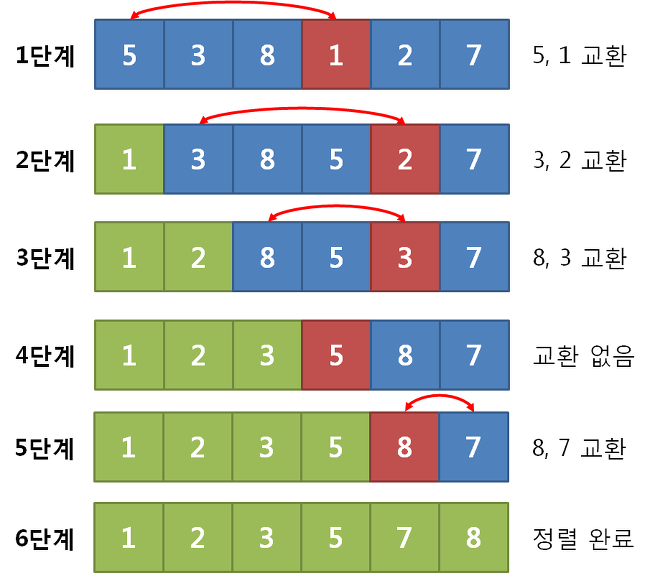

단순 선택 정렬 알고리즘 과정
1. 아직 정렬하지 않은 범위에서 값이 가장 작은 원소를 선택한다.
2. 아직 정렬하지 않은 부분의 맨 앞 원소와 교환한다.
3. 정렬이 완료될 때까지 1번, 2번을 반복한다.


In [ ]:
# 실습 6-6
# 단순 선택 정렬 알고리즘 구현

from typing import MutableSequence

def selection_sort(a: MutableSequence) -> None:
    """단순 선택 정렬"""
    n = len(a)
    for i in range(n - 1):
        min = i     # 아직 정렬되지 않은 배열에서 가장 작은 원소의 인덱스
                    # 일단 맨 앞 원소부터 가장 작다고 가정을 하고
        for j in range(i + 1, n):   # 한 칸씩 뒤로 가면서 더 작은 수가 있는지 찾는다.
            if a[j] < a[min]:       # 더 작은 원소가 있다면
                min = j             # 그 원소의 인덱스를 min으로 지정한다.
        a[i], a[min] = a[min], a[i]  # 정렬 할 부분에서 맨 앞의 원소와 가장 작은 원소를 교환 

if __name__ == '__main__':
    print('단순 선택 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    selection_sort(x)  # 배열 x를 단순 선택 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

* 단순 선택 정렬 알고리즘의 비교횟수와 시간 복잡도
> 배열의 원소 수가 n개 일 때, <br>`
1번째 루틴 : (인덱스0='정렬되지 않은 배열의 맨 앞 원소와) 인덱스1 부터 인덱스n-1 원소까지 비교 → n-1번` <br>
`2번째 루틴 : (인덱스1과) 인덱스2 부터 인덱스n-1 원소까지 비교 → n-2번`<br>` ... `<br> `n-1번째 루틴 : (인덱스n-1과) 인덱스n-1 부터 인덱스n-1 원소까지 비교 → 1번`
<br> 총 비교횟수는 $(n-1) + (n-2) + \dots + 2 + 1 = \frac{n(n-1)}{2}$번이 된다.
<br> 단순 선택 정렬 알고리즘의 시간 복잡도 : $O(n^2)$

# 6.4 단순 삽입 정렬

* 단순 삽입 정렬
<br> 주목한 원소보다 더 앞쪽에서 알맞은 위치로 삽입하며 정렬하는 알고리즘

단순 삽입 정렬 알고리즘 과정
1. 아직 정렬되지 않은 배열의 맨 앞 원소를 정렬된 배열의 알맞은 위치에 삽입한다.<br> < NOTE >
<br> 첫번째 회전에서, <br>배열의 맨 앞 원소를 이미 정렬된 배열로 생각하고
<br> 정렬되지 않은 배열의 맨 앞 원소는 전체 배열의 두번째 원소로 하여 진행한다.<br> 
<br> <알맞은 위치에 삽입하는 방법>
<br> a. 주목한 원소보다 작은 원소를 만날 때까지 주목한 원소와 이웃한 왼쪽 원소를 하나씩 대입한다.
<br> b. 주목한 원소보다 작은 원소를 만나면 멈춘 위치에 주목한 원소를 대입한다.
2. 위의 과정을 반복한다.


종료 조건
1. 정렬된 배열의 왼쪽 끝에 도달한 경우
2. tmp보다 작거나 키값이 같은 원소를 발견할 경우

In [1]:
# 실습 6-7
# 단순 삽입 정렬 알고리즘 구현하기

from typing import MutableSequence

def insertion_sort(a: MutableSequence) -> None:
    """단순 삽입 정렬"""
    n = len(a)
    for i in range(1, n):   # 1부터(배열의 두번째 원소부터) 시작함을 잊지말자!!
        j = i
        tmp = a[i]  # 정렬되지 않은 배열의 맨 앞 원소를 tmp에 저장
        while j > 0 and a[j - 1] > tmp:     # 계속 조건 두가지 다 만족해야함
            a[j] = a[j - 1]     # 주목하는 원소와 이웃한 원소를 주목하는 원소의 위치에 대입함
            j -= 1      # 대입했으니까 그 전 원소를 주목하는 원소로 만들어야함. 그래서 -1
        a[j] = tmp

if __name__ == '__main__':
    print('단순 삽입 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    insertion_sort(x)  # 배열 x를 단순 삽입 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

단순 삽입 정렬을 수행합니다.
원소 수를 입력하세요.: 7
x[0]: 6
x[1]: 4
x[2]: 3
x[3]: 7
x[4]: 1
x[5]: 9
x[6]: 8
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 4
x[3] = 6
x[4] = 7
x[5] = 8
x[6] = 9


단순 삽입 정렬 알고리즘은 서로 떨어져 있는 원소를 교환하지 않으므로 안정적이다.

* 단순 삽입 정렬 알고리즘의 비교횟수와 시간 복잡도<br>
`1번째 회전 : 2번째 원소와 1번째 원소 비교 → 1번 비교`<br>
`2번째 회전 : 3번째 원소와 2번째, 1번째 원소 비교 → 2번 비교`<br>
`...`<br>
`n-1번째 회전 : n번째 원소와 n-1번째, ... ,1번째 원소 비교 → n-1번 비교`
<br> 총 비교횟수는 $(n-1) + (n-2) + \dots + 2 + 1 = \frac{n(n-1)}{2}$번이 된다.
<br> 단순 선택 정렬 알고리즘의 시간 복잡도 : $O(n^2)$